# Exercise 5: Using ggplot

This homework assignment is designed to get you comfortable working with `ggplot` for generating data visualizations.

We will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/index.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Color, plot type and layers (6 points)

Install and load the `gapminder` dataset. Look at the first few rows of the data frame.

In [1]:
install.packages("gapminder")
library(gapminder)
library(dplyr)
library(ggplot2)
head(gapminder)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




country     continent year lifeExp pop      gdpPercap
1 Afghanistan Asia      1952 28.801   8425333 779.4453 
2 Afghanistan Asia      1957 30.332   9240934 820.8530 
3 Afghanistan Asia      1962 31.997  10267083 853.1007 
4 Afghanistan Asia      1967 34.020  11537966 836.1971 
5 Afghanistan Asia      1972 36.088  13079460 739.9811 
6 Afghanistan Asia      1977 38.438  14880372 786.1134

Now, let's create a basic scatterplot using `ggplot2` that shows how life expectancy has changed over time.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


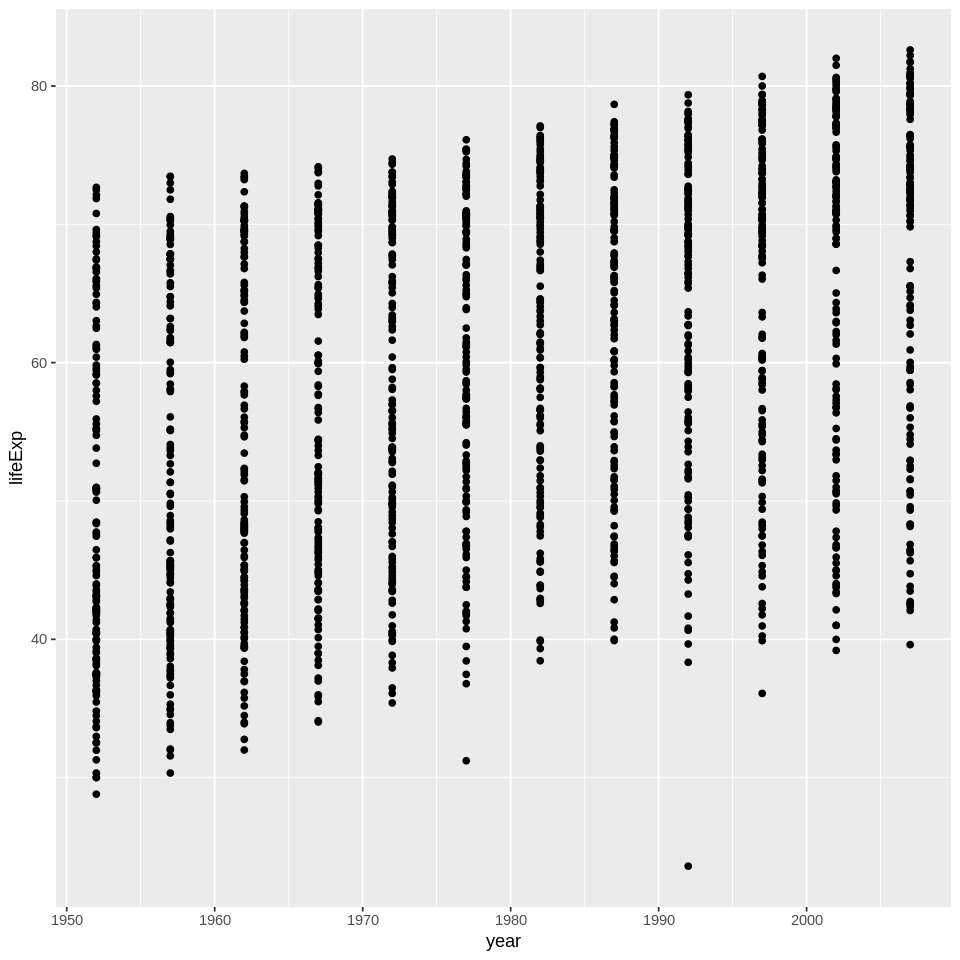

In [2]:
options(repr.plot.width=8, repr.plot.height=8)
library(tidyverse)
ggplot(gapminder, aes(x=year, y=lifeExp)) +
    geom_point()


We can add another layer of detail by using color to indicate continent. Modify the code from the previous question to to do so.

What trends can you identify in the data?

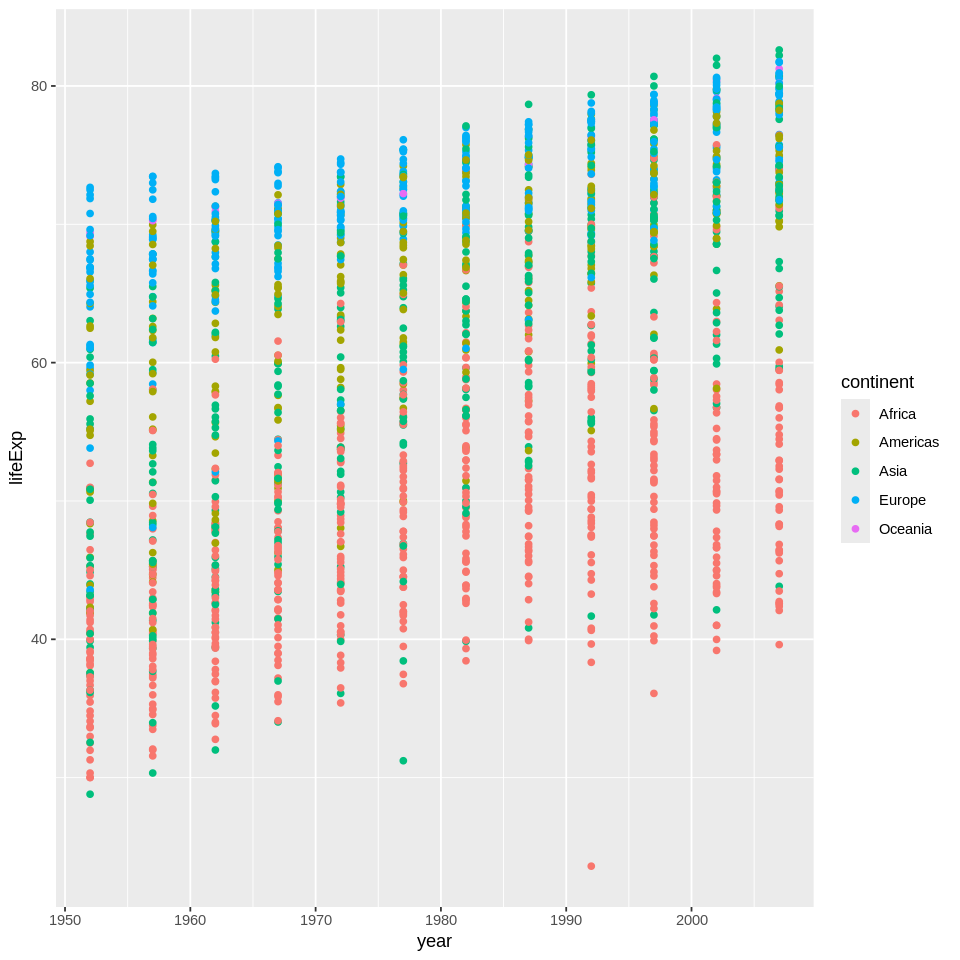

In [3]:
options(repr.plot.width=8, repr.plot.height=8)
library(tidyverse)
ggplot(gapminder, aes(x=year, y=lifeExp, color=continent)) +
    geom_point()


> *Write your response here.*
> * I can interpret from the figure that Europe , Oceania and Americas has higher life expectancy compared to Afica across the years.

> * Asia seems to be in the middle in terms of life expectancy compared to other continents.

> * In general the life expectancy has been growing through the years in all the continents.


Using a scatterplot probably isn’t the best type of plot for effectively visualizing change over time. Instead, modify the code from the previous question to create a line plot.

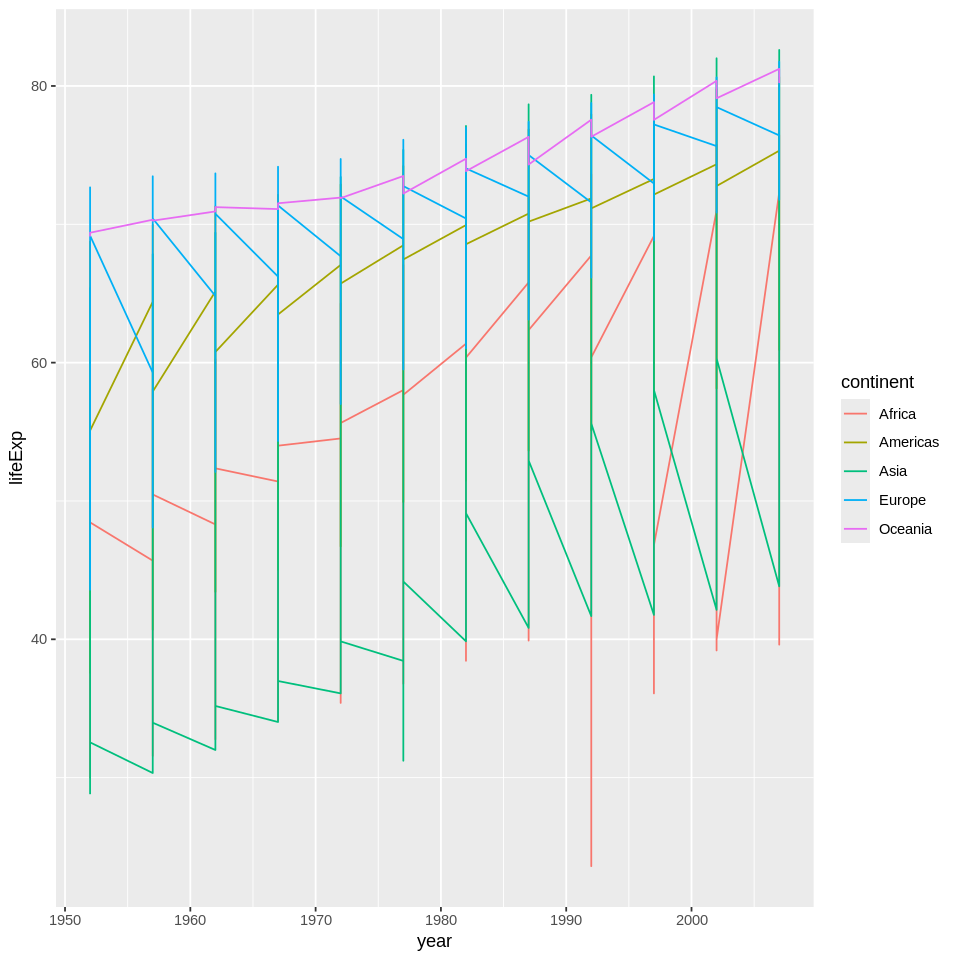

In [4]:
ggplot(gapminder, aes(x=year, y=lifeExp , color=continent)) +
    geom_line()


Hmm, this plot looks a bit weird and unexpected, making it difficult for us to easily interpret the data trends. What is causing this?

> *Write your response here.*
> * Because we cannot easily visualize the data trends by continents with this discontinous lines


Now, let’s try to separate the data by country, plotting one line for each country. Modify the code from the previous plot to do so.

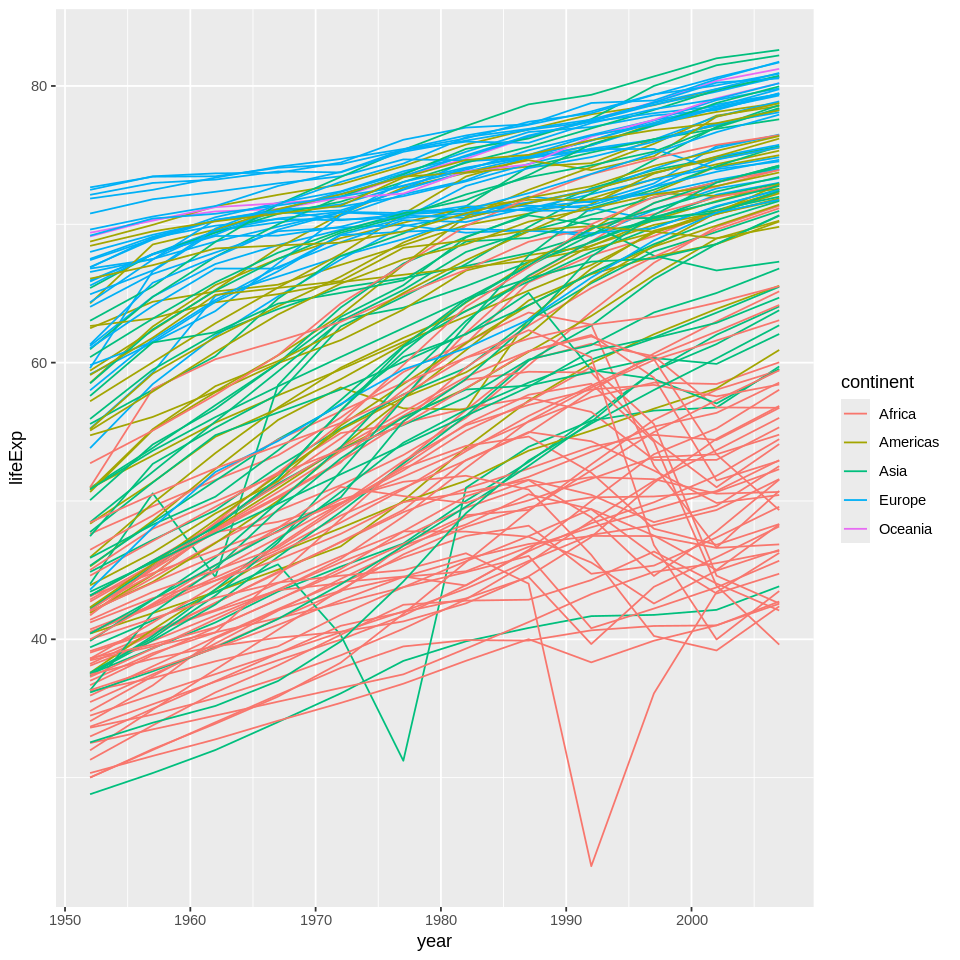

In [28]:
ggplot(gapminder, aes(x=year, y=lifeExp,color = continent, group = country))+
    geom_line()

But what if we want to visualize both lines and points on our graph? There are two primary ways to do this - taking advantage of what we know about using layers for ggplot (each layer is drawn on top of the previous layer).

* Method 1: Plot black points on top of the colorful lines
* Method 2: Plot black points underneath the colorful lines

Modify the code from the previous question to create two plots, one for each method.

*Hint: to control the color of the points, think about where the aesthetic color attribute should be located e.g., in the global plot options or in a specific layer.*

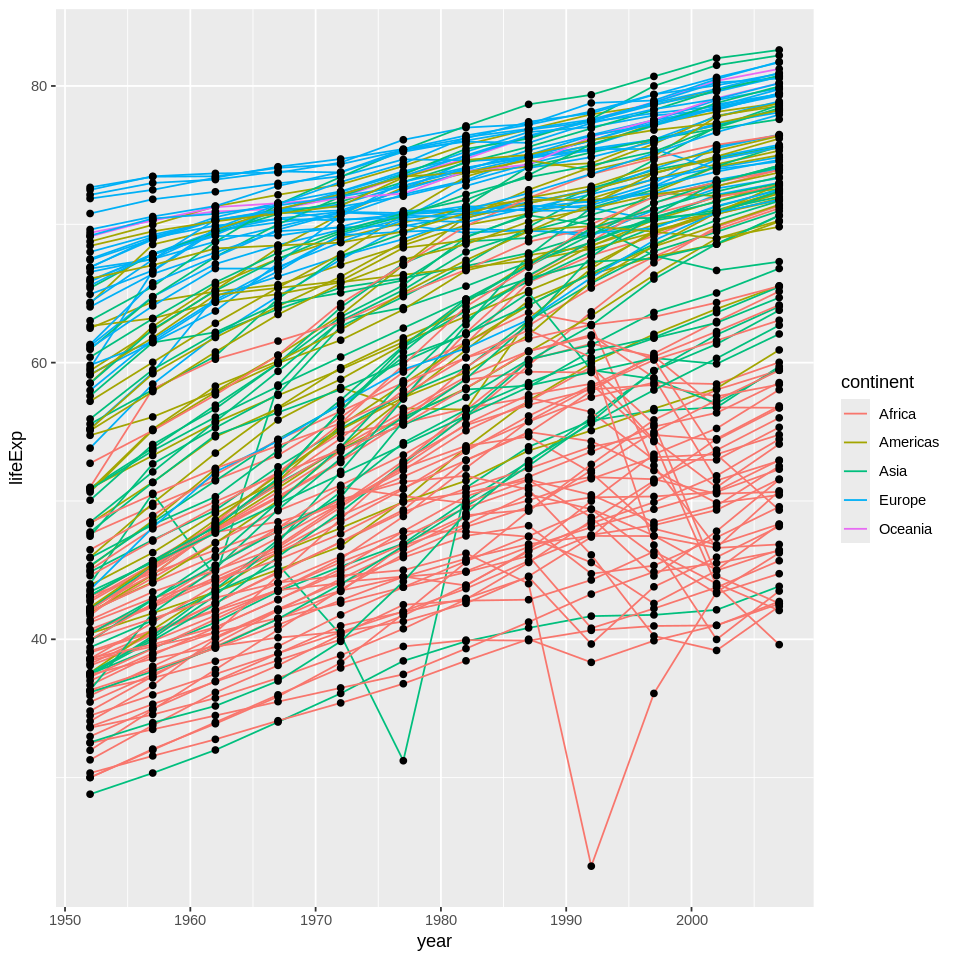

In [34]:
ggplot(gapminder, aes(x=year, y=lifeExp, color = continent, group = country)) +
    geom_line() +
    geom_point(color='black')

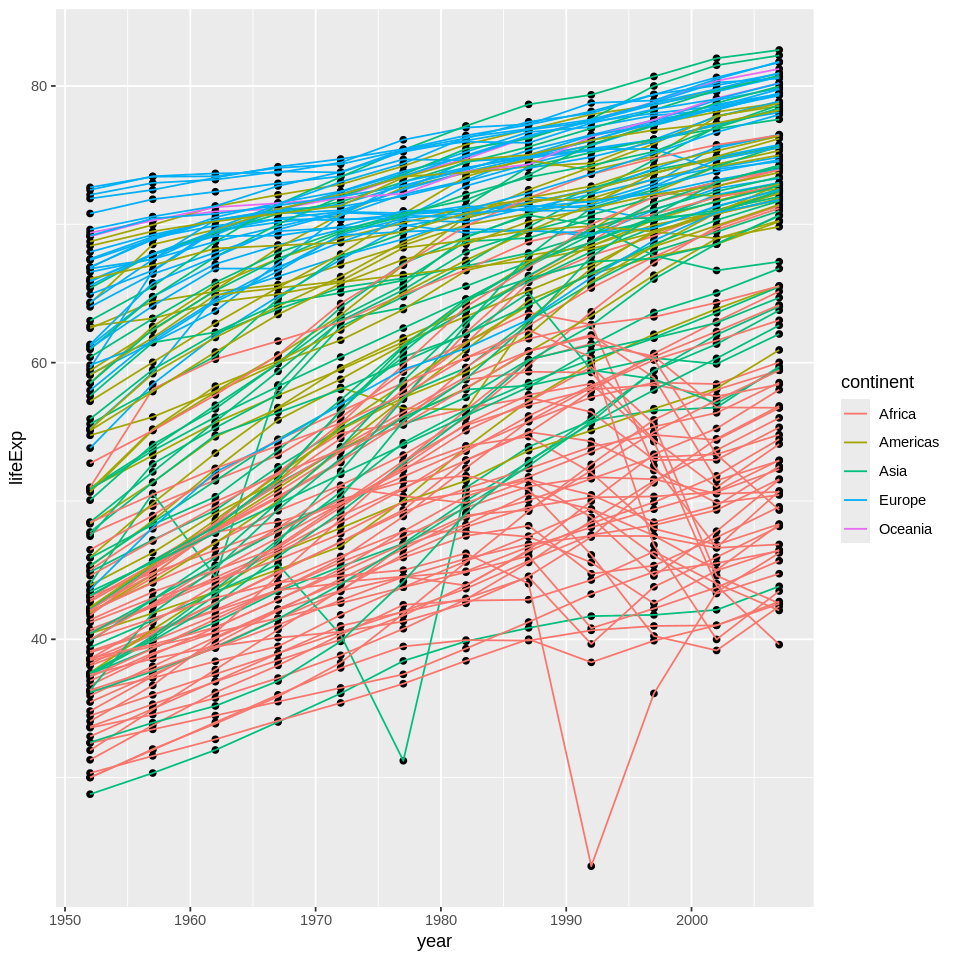

In [35]:
ggplot(gapminder, aes(x=year, y=lifeExp, color = continent, group = country)) +
    geom_point(color='black') +
    geom_line()


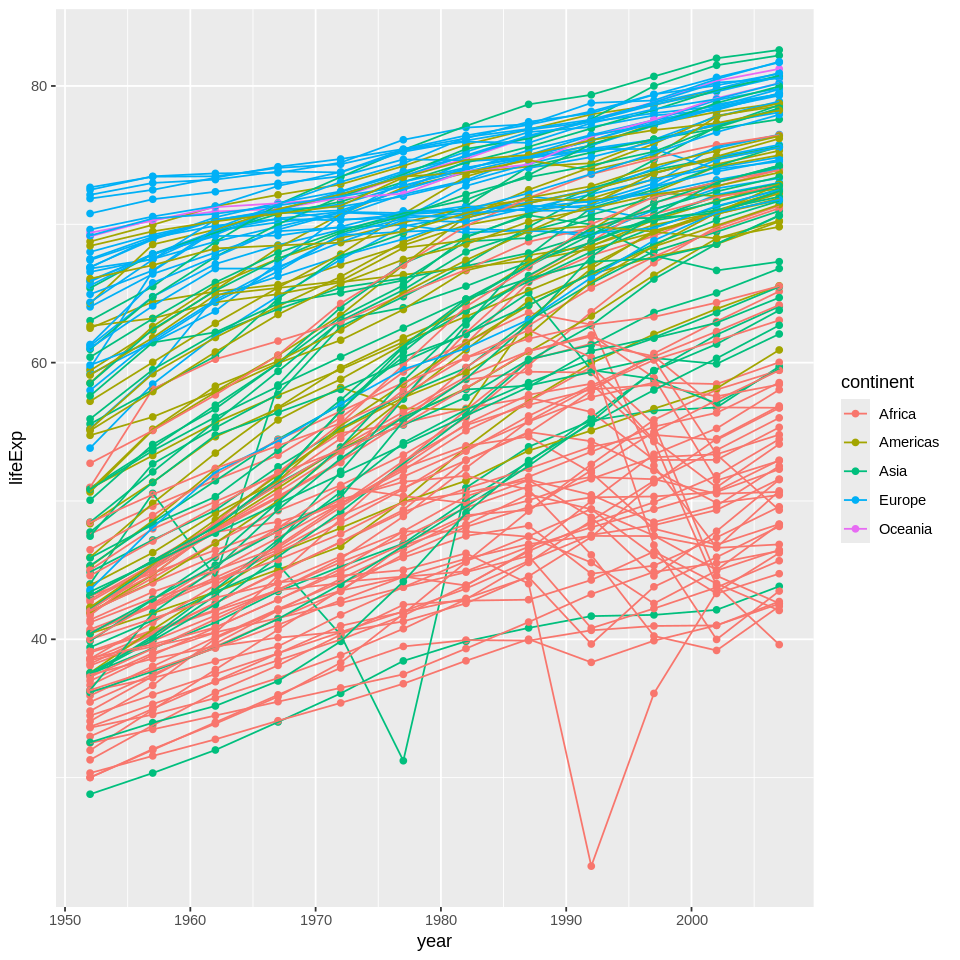

In [32]:
ggplot(gapminder, aes(x=year, y=lifeExp, color = continent, group = country)) +
    geom_point() +
    geom_line()



---
# 2. Adding statistics (4 points)

`ggplot2` allows easy overlay of statistical models on top of the data.

The graph below shows the relationship between life expectency and GDP per capita:

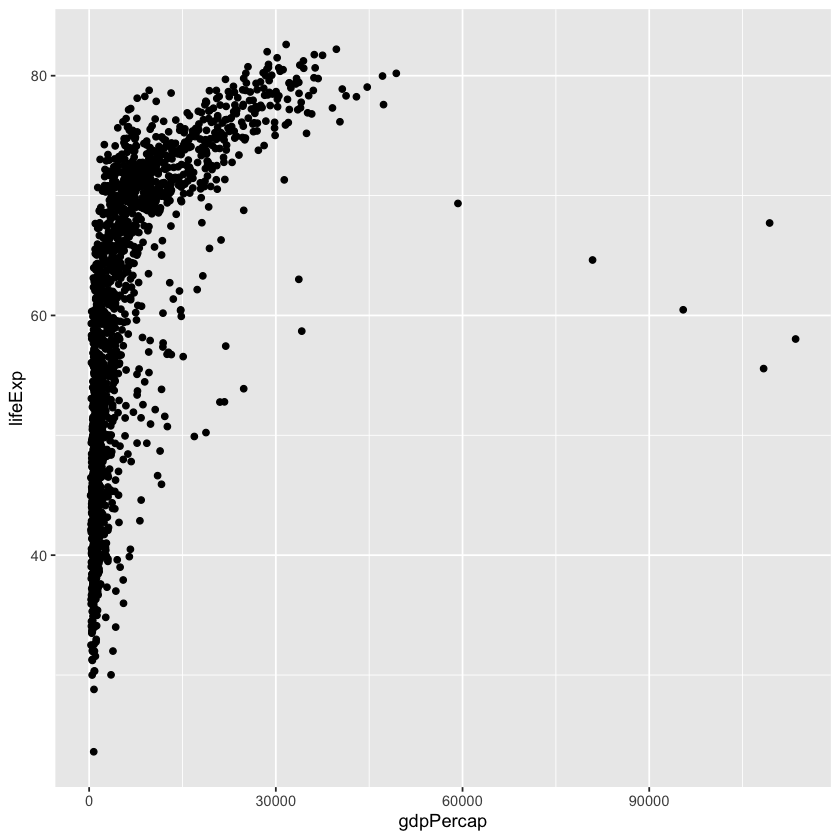

In [ ]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

However, the data points are squished close together on the left side of the graph, so it's hard to see the actual relationship we're interested in.

To fix this, we can change the scale of x-axis units using the scale functions. We can also make the data points transparent using the alpha function. This is helpful when there is a large amount of clustered data.

Modify the code above to incorporate these two changes (scale and transparency).

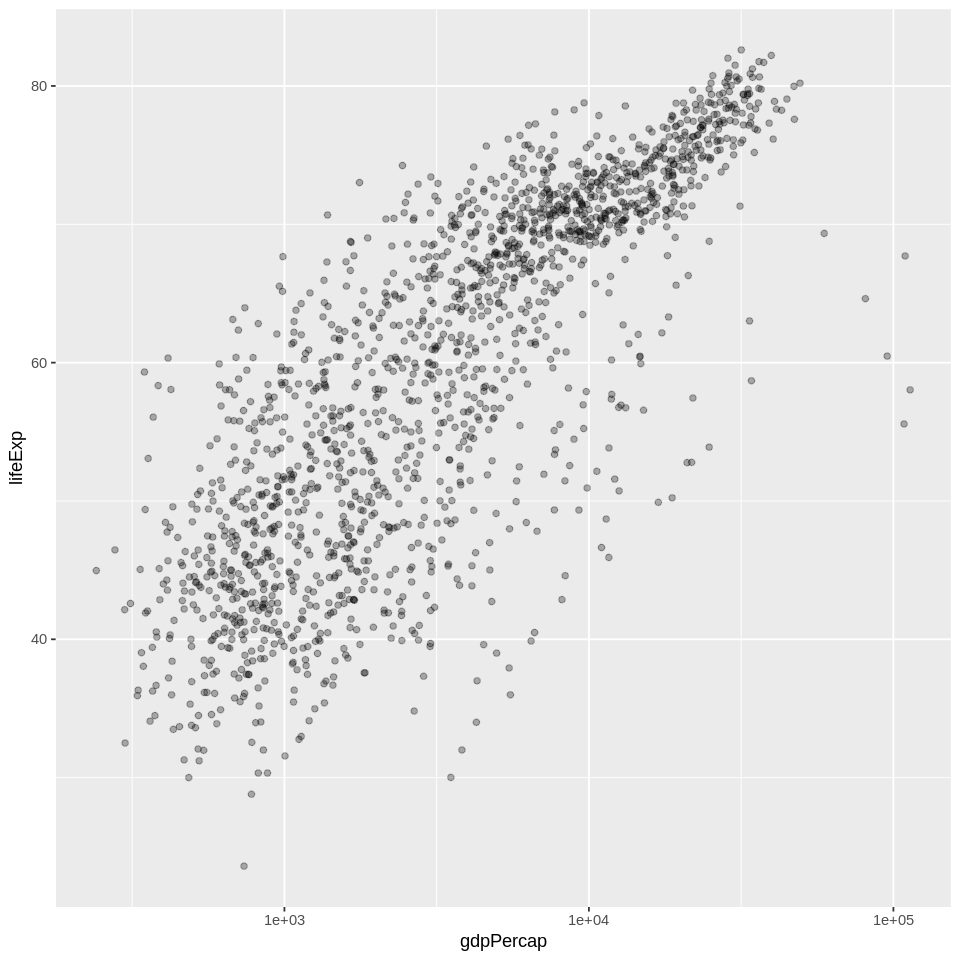

In [36]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point(color = 'black', alpha= 0.3) +
  scale_x_log10(name = 'gdpPercap')


Already we can more easily visualize the trend in the data.

Next, let's overlay statistics by fiting a simple relationship to the data. Modify the code from the previous question by adding a `geom_smooth` layer.

`geom_smooth()` using formula = 'y ~ x'


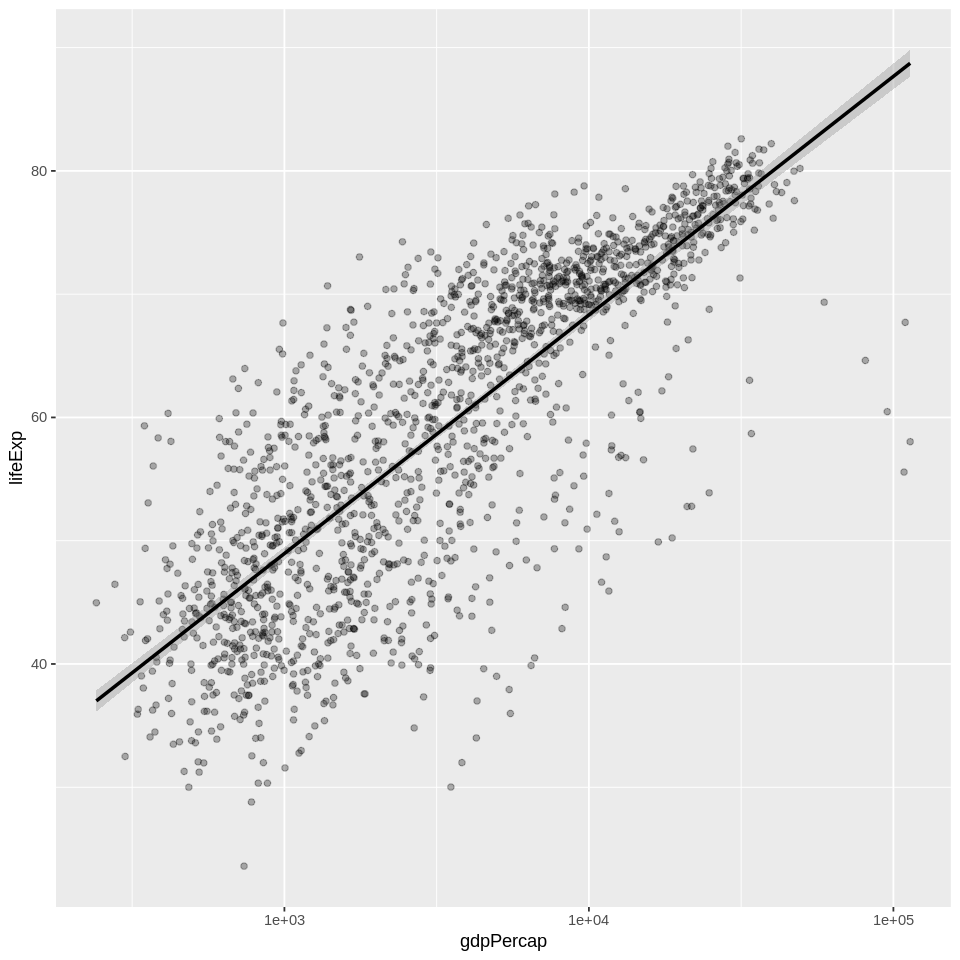

In [40]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point(color = 'black', alpha= 0.3) +
  scale_x_log10(name = 'gdpPercap') +
  geom_smooth(method="lm", color= "black", se = TRUE)


Again, we can add a layer of detail by introducing separate colors for each continent. We can also create individual trendlines for each continent, instead of only one trendline.

Modify the code from the previous question to add these elements.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


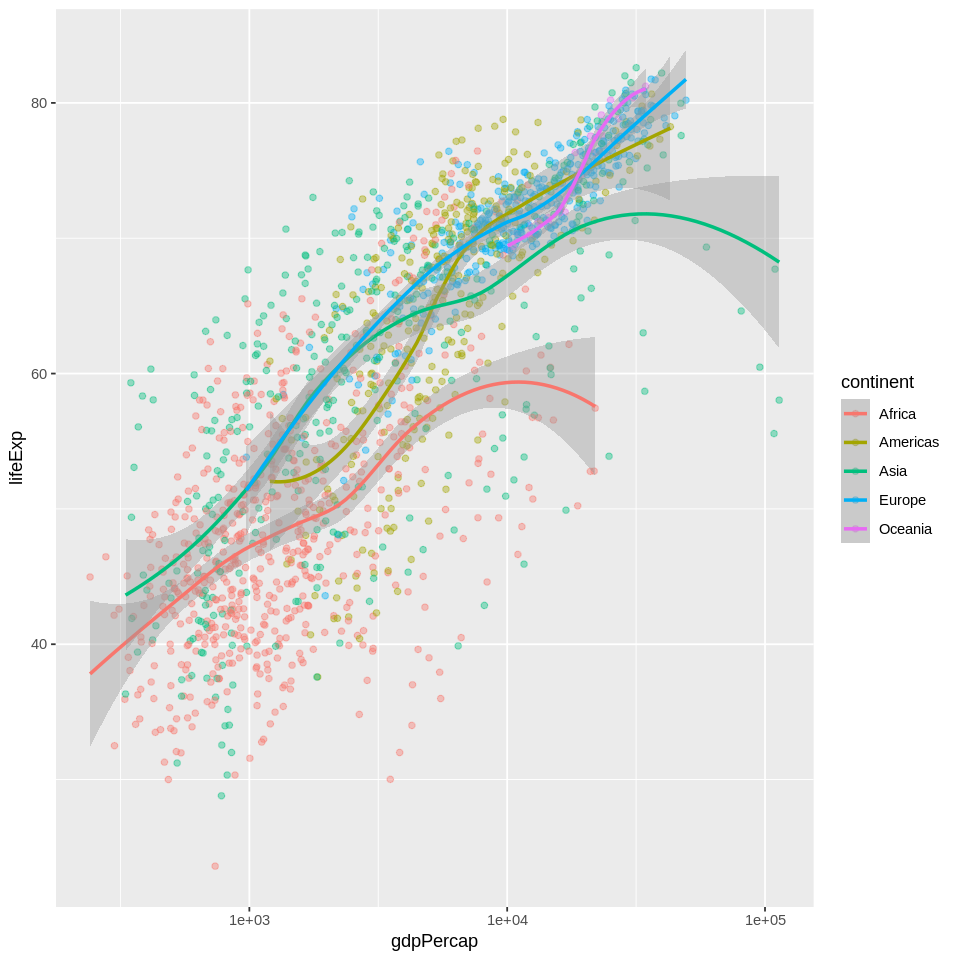

In [41]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp , color=continent)) +
  geom_point(alpha= 0.4) +
  scale_x_log10(name = 'gdpPercap') +
  geom_smooth()



When you are finished, save the notebook as Exercise5.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas.

**DUE:** 5pm EST, Feb 12, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*